In [57]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch
import pandas as pd
import re

In [141]:
# Import voting data at precinct level
NC_precinct_vote = pd.read_csv("/Users/yiliwang/NC_precinct_vote.csv")

In [142]:
NC_precinct_vote_party = NC_precinct_vote[['county','precinct','cd','g2008_USH_rv','g2008_USH_dv']]

In [143]:
# Import geocode data at precinct level
NC_precinct_geo = gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Voting_PRECINCTS_09012012_Shapefile/SBE_PRECINCTS_09012012.shp")

In [144]:
NC_precinct_geo['ENR_DESC'] = [re.sub(r'.*_', '', item) for item in [str(i) for i in NC_precinct_geo['ENR_DESC']]]

In [145]:
# Merge shapefile dataframe with voting dataframe: NC_geo_vote_byPrecinct
NC_geo_vote_byPrecinct = pd.merge(NC_precinct_geo,NC_precinct_vote_party,left_on='ENR_DESC',right_on='precinct',how='inner')

In [146]:
party_spt_ratio = NC_geo_vote_byPrecinct['g2008_USH_dv']/NC_geo_vote_byPrecinct['g2008_USH_rv'] # party support ratio

In [266]:
NC_geo_vote_byPrecinct['party_spt_ratio']= party_spt_ratio # add a new column to the dataframe

In [267]:
# Deal with exceptions: Two precincts have 0 vote for Republican
NC_geo_vote_byPrecinct[NC_geo_vote_byPrecinct['party_spt_ratio'] == max(NC_geo_vote_byPrecinct['party_spt_ratio'])]

,COUNTY_ID,COUNTY_NAM,ENR_DESC,PREC_ID,geometry,county,precinct,cd,g2008_USH_rv,g2008_USH_dv,party_spt_ratio
351,33,EDGECOMBE,ROCKY MOUNT 5,1205,"POLYGON ((2362253.861208588 804913.5317688435,...",EDGECOMBE,ROCKY MOUNT 5,1,1.0,261.0,261.0


In [268]:
# assign the maximum ratio value to these two exceptions
# 更改!!!!!!!!!!!
NC_geo_vote_byPrecinct = NC_geo_vote_byPrecinct.drop(NC_geo_vote_byPrecinct.index[[838,840]]) # drop for NOW

In [269]:
ind_NA = NC_geo_vote_byPrecinct[np.isnan(NC_geo_vote_byPrecinct['party_spt_ratio'])].index
NC_geo_vote_byPrecinct= NC_geo_vote_byPrecinct.drop(NC_geo_vote_byPrecinct.index[ind_NA])

IndexError: index 1951 is out of bounds for axis 1 with size 1878

In [263]:
NC_geo_vote_byPrecinct['party_spt_ratio']

0       0.643873
1       0.610969
2       0.591043
3       0.551598
4       0.454844
5       0.350975
6       3.505792
7       0.204301
8       3.505792
9       0.204301
10      7.158730
11      0.588092
12      0.216783
13      1.880734
14      1.576873
15      1.736939
16      2.735714
17      3.606349
18      1.953719
19      1.618926
20      1.233645
21      1.448435
22      1.378401
23      2.574879
24      1.201031
25      3.440000
26      1.773300
27      1.773300
28      1.707692
29      1.810734
          ...   
1939    0.840948
1940    0.647860
1941    0.902622
1942    0.492157
1943    0.578588
1944    0.805785
1945    0.655022
1946    0.606025
1947    0.381616
1948    0.586716
1949    2.808696
1950    0.213873
1951         NaN
1952    0.335714
1954         NaN
1955    1.086207
1957    1.717770
1958    2.147321
1959    0.299720
1960    1.553448
1961    2.008811
1962    1.698718
1963    1.665208
1964    0.509716
1965    0.420141
1966    3.425249
1967    3.425249
1968    8.5783

In [259]:
#NC_geo_vote_byPrecinct['party_spt_ratio']
np.percentile(list(NC_geo_vote_byPrecinct['party_spt_ratio']),95)

nan

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1e3884890>)

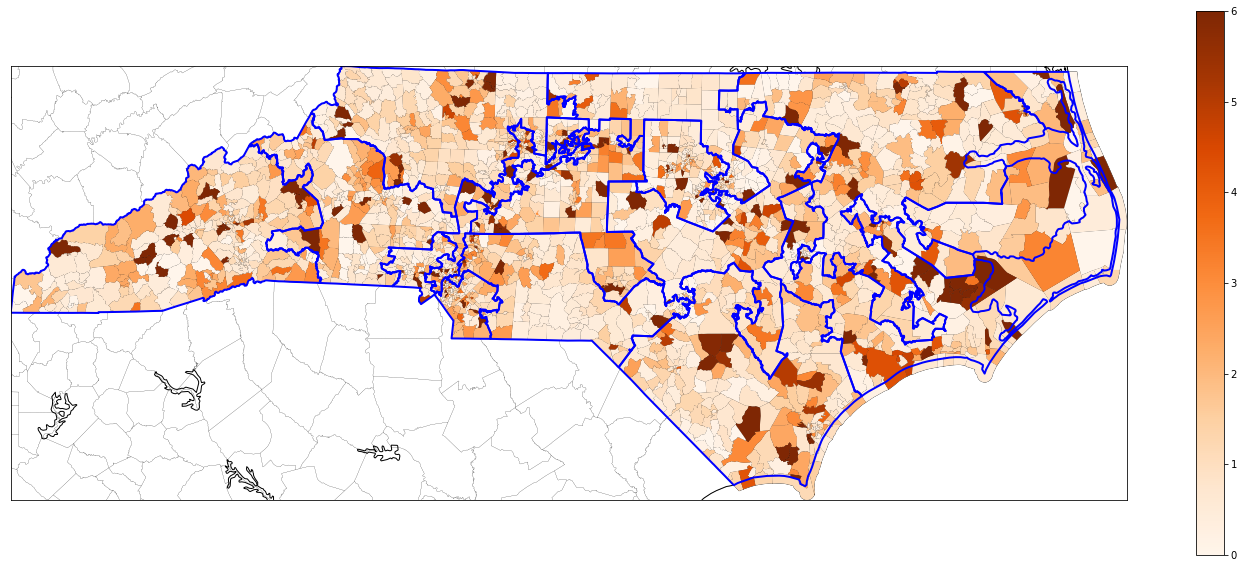

In [233]:
import matplotlib.cm
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Downloads/NC_Shapefiles/nc_final", "nc_final") 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.nc_final]
    })


cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(map_shapes.shapes, zorder=2)


#norm = Normalize()
norm = mpl.colors.Normalize(vmin=0, vmax=6)
 
pc.set_facecolor(cmap(norm(NC_geo_vote_byPrecinct['party_spt_ratio'].fillna(0).values)))
#pc.set_facecolor(cmap(norm(NC_geo_vote_byPrecinct['g2008_USH_rv'].fillna(0).values)))
#pc.set_facecolor(cmap(norm(NC_geo_vote_byPrecinct['g2008_USH_dv'].values)))

ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(NC_geo_vote_byPrecinct['party_spt_ratio'])

plt.colorbar(mapper, shrink=0.4)

# Add another layer of shapefiles of Congressional District
m.readshapefile('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110', 'cd37_110', drawbounds=True, linewidth=2, color='b')